In [ ]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataISPUDKI.csv')
data

,Unnamed: 0,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,pm25,categori
0,0,1/1/2021,DKI1 (Bunderan HI),38.0,29.0,6.0,31.0,13.0,53.0,PM25,53.0,SEDANG
1,1,1/2/2021,DKI1 (Bunderan HI),27.0,27.0,7.0,47.0,7.0,47.0,O3,46.0,BAIK
2,2,1/3/2021,DKI1 (Bunderan HI),44.0,25.0,7.0,40.0,13.0,58.0,PM25,58.0,SEDANG
3,3,1/4/2021,DKI1 (Bunderan HI),30.0,24.0,4.0,32.0,7.0,48.0,PM25,48.0,BAIK
4,4,1/5/2021,DKI1 (Bunderan HI),38.0,24.0,6.0,31.0,9.0,53.0,PM25,53.0,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,2021-12-27,DKI5 (Kebon Jeruk),54.0,36.0,14.0,21.0,47.0,76.0,PM25,76.0,SEDANG
1721,1721,2021-12-28,DKI5 (Kebon Jeruk),44.0,20.0,11.0,21.0,33.0,68.0,PM25,68.0,SEDANG
1722,1722,2021-12-29,DKI5 (Kebon Jeruk),34.0,28.0,8.0,25.0,29.0,54.0,PM25,54.0,SEDANG
1723,1723,2021-12-30,DKI5 (Kebon Jeruk),53.0,25.0,15.0,23.0,44.0,75.0,PM25,75.0,SEDANG


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1725 non-null   datetime64[ns]
 1   stasiun   1725 non-null   object        
 2   pm10      1725 non-null   float64       
 3   so2       1725 non-null   float64       
 4   co        1725 non-null   float64       
 5   o3        1725 non-null   float64       
 6   no2       1725 non-null   float64       
 7   max       1725 non-null   float64       
 8   critical  1725 non-null   object        
 9   pm25      1725 non-null   float64       
 10  categori  1725 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 148.4+ KB


In [ ]:
# cek ukuran dataframe
print(data.shape)

(1725, 11)


In [ ]:
data

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,pm25,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,29.0,6.0,31.0,13.0,53.0,PM25,53.0,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,27.0,7.0,47.0,7.0,47.0,O3,46.0,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,25.0,7.0,40.0,13.0,58.0,PM25,58.0,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,24.0,4.0,32.0,7.0,48.0,PM25,48.0,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,24.0,6.0,31.0,9.0,53.0,PM25,53.0,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1720,2021-12-27,DKI5 (Kebon Jeruk),54.0,36.0,14.0,21.0,47.0,76.0,PM25,76.0,SEDANG
1721,2021-12-28,DKI5 (Kebon Jeruk),44.0,20.0,11.0,21.0,33.0,68.0,PM25,68.0,SEDANG
1722,2021-12-29,DKI5 (Kebon Jeruk),34.0,28.0,8.0,25.0,29.0,54.0,PM25,54.0,SEDANG
1723,2021-12-30,DKI5 (Kebon Jeruk),53.0,25.0,15.0,23.0,44.0,75.0,PM25,75.0,SEDANG


(1725, 11) artinya pada dataset ini kita memiliki 1725 baris dan 11 kolom/feature

In [ ]:
data.groupby('categori').count()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,pm25
categori,,,,,,,,,,
BAIK,139,139,139,139,139,139,139,139,139,139
SEDANG,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314
TIDAK SEHAT,272,272,272,272,272,272,272,272,272,272


In [ ]:
data.groupby('stasiun').count()

,tanggal,pm10,so2,co,o3,no2,max,critical,pm25,categori
stasiun,,,,,,,,,,
DKI1 (Bunderan HI),365,365,365,365,365,365,365,365,365,365
DKI2 (Kelapa Gading),349,349,349,349,349,349,349,349,349,349
DKI3 (Jagakarsa),358,358,358,358,358,358,358,358,358,358
DKI4 (Lubang Buaya),323,323,323,323,323,323,323,323,323,323
DKI5 (Kebon Jeruk),330,330,330,330,330,330,330,330,330,330


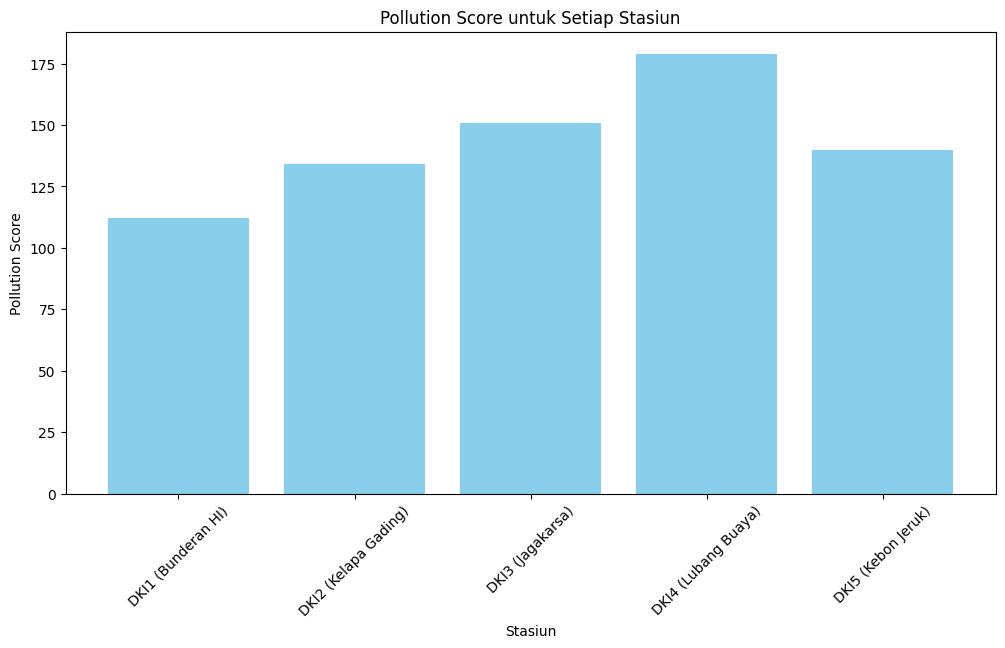

Kota paling berpolusi adalah DKI4 (Lubang Buaya)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Kelompokkan data berdasarkan stasiun
grouped_data = data.groupby('stasiun').agg({
    'pm10': 'max',
    'so2': 'max',
    'co': 'max',
    'o3': 'max',
    'no2': 'max',
    'pm25': 'max'
})

# Hitung nilai rata-rata atau maksimum dari keenam kolom
grouped_data['pollution_score'] = grouped_data[['pm10', 'so2', 'co', 'o3', 'no2', 'pm25']].max(axis=1)

# Tentukan stasiun dengan nilai tertinggi sebagai kota paling berpolusi
most_polluted_station = grouped_data['pollution_score'].idxmax()

# Visualisasikan data
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['pollution_score'], color='skyblue')
plt.title('Pollution Score untuk Setiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Pollution Score')
plt.xticks(rotation=45)
plt.show()

print(f"Kota paling berpolusi adalah {most_polluted_station}")


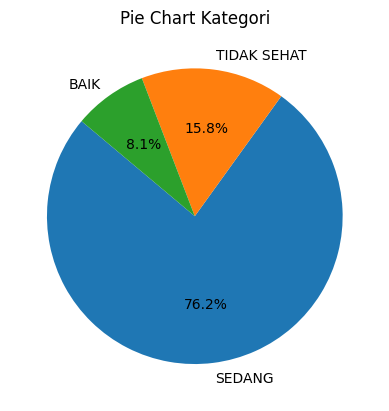

In [ ]:
category_counts = data['categori'].value_counts()
sizes = category_counts.values
labels = category_counts.index
# Membuat pie chart dengan label yang telah ditentukan
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Pie Chart Kategori')

# Menampilkan pie chart
plt.show()


In [ ]:
plt.savefig('pie_chart_kategori.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['categori'] = label_encoder.fit_transform(data['categori'])


In [ ]:
data.groupby('categori').count()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,pm25
categori,,,,,,,,,,
0,139,139,139,139,139,139,139,139,139,139
1,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314
2,272,272,272,272,272,272,272,272,272,272


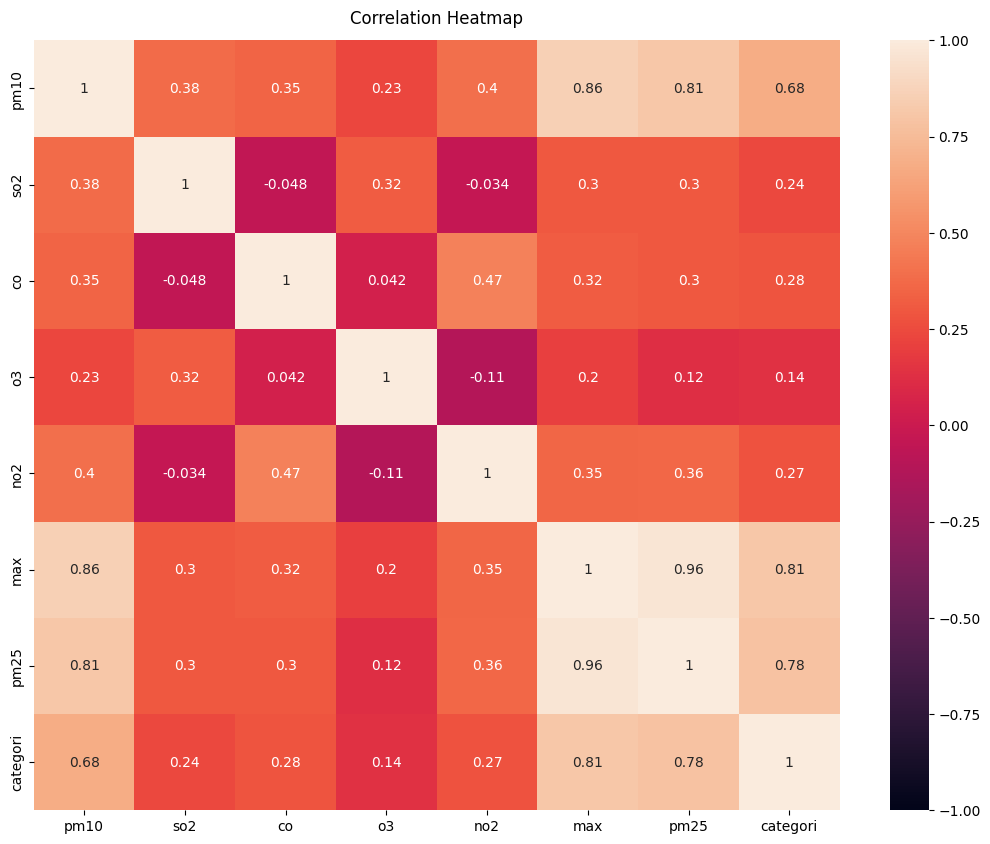

In [ ]:
# mengimpor pyplot dari matplotlib untuk membantu kita membuat plot
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns
# menentukan ukuran plot
plt.figure(figsize=(13, 10))
# membuat korelasi heatmap
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
# menentukan format plot (judul, ukuran text)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = data.drop(columns=['categori','max','critical','tanggal','stasiun'])
# memilih kolom untuk digunakan sebagai variabel target
y = data['categori']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (1380, 6)
X_test :  (345, 6)
Y_train :  (1380,)
Y_test :  (345,)


In [ ]:
print('Kelas dan jumlah nilai di trainset',Counter(y_train))

Kelas dan jumlah nilai di trainset Counter({1: 1048, 2: 225, 0: 107})


## Data Imbalance

Di sini kita melihat bahwa label target tidak dibagi dengan setara. Ini akan menyebabkan masalah ketidakseimbangan data. Untuk mengatasi masalah ini, kita menggunakan teknik yang disebut SMOTE (Synthetic Minority Oversampling Technique). Pendekatan ini memecahkan masalah ini dengan melakukan oversampling pada contoh-contoh dalam kelas minoritas.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(x_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({2: 1048, 1: 1048, 0: 1048})


## Classification

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_predict1=rf.predict(x_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 31   1   0]
 [  0 266   0]
 [  0   1  46]]


accuracy 99.42028985507247


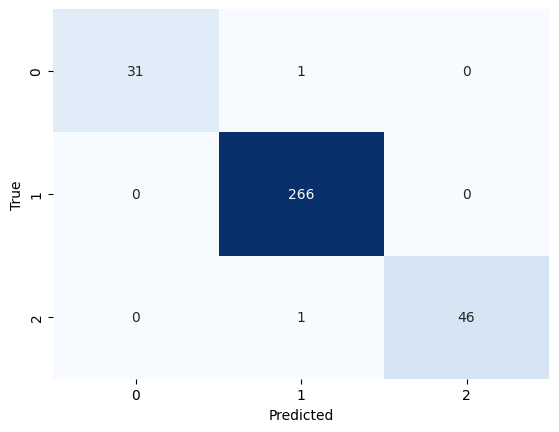

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Misalnya, y_true adalah label sebenarnya, y_pred adalah hasil prediksi model
cm = confusion_matrix(y_test, rf_predict)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.99      1.00      1.00       266
           2       1.00      0.98      0.99        47

    accuracy                           0.99       345
   macro avg       1.00      0.98      0.99       345
weighted avg       0.99      0.99      0.99       345



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

rf_acc_score=knn.score(x_test, y_test)

print("confussion matrix")
print(cm)
print("\n")
print("accuracy",rf_acc_score*100)


confussion matrix
[[ 30   2   0]
 [ 13 244   9]
 [  0   1  46]]


accuracy 92.7536231884058


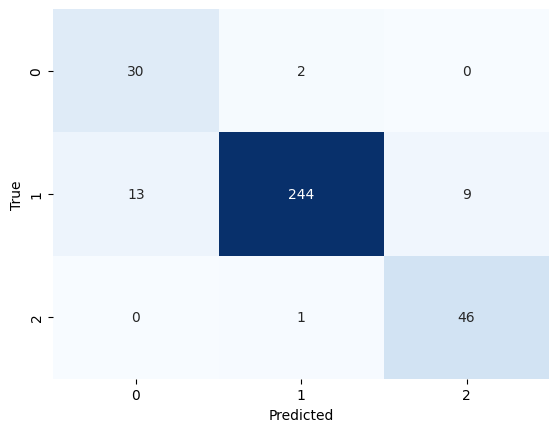

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Misalnya, y_true adalah label sebenarnya, y_pred adalah hasil prediksi model
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        32
           1       0.99      0.92      0.95       266
           2       0.84      0.98      0.90        47

    accuracy                           0.93       345
   macro avg       0.84      0.94      0.88       345
weighted avg       0.94      0.93      0.93       345



In [ ]:
cls=SVC()
cls.fit(x_train,y_train)
svmpred=cls.predict(x_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 32   0   0]
 [ 17 239  10]
 [  0   0  47]]


accuracy 92.17391304347827


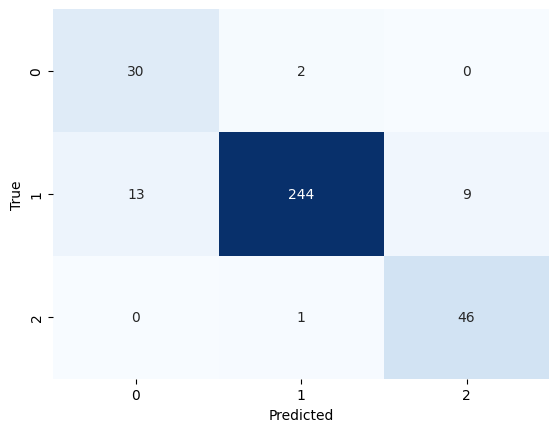

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  y_test adalah label sebenarnya, y_pred adalah hasil prediksi model
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,svmpred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        32
           1       1.00      0.90      0.95       266
           2       0.82      1.00      0.90        47

    accuracy                           0.92       345
   macro avg       0.83      0.97      0.88       345
weighted avg       0.94      0.92      0.93       345

